In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as ns

**Reading and explain the dataset**

In [2]:
dataset=pd.read_csv("ad.csv")
dataset

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


**Remove the Unnamaed Column**

In [3]:
dataset = dataset.loc[:, ~dataset.columns.str.contains('^Unnamed')]
dataset

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Dataset contained  an unnamed column. Normalised the dataset by removed the unnamed column. dataset contain data values in float, and has no null values. 

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
dataset.shape

(200, 4)

**2. check the summary statistics and discuss the max,min,avg,median and percentiles**

In [6]:
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
dataset.median()

TV           149.75
Radio         22.90
Newspaper     25.75
Sales         12.90
dtype: float64

The average of Tv,Radio & Newspaper is 147.0425,23.264 and 30.554 respectively. That mean spending an average of 147.0425 for Tv advertisement, an average of 23.264 for Radio advertisement and an average of 30.554 for newspaper advertisement.

The max value of Tv,Radio & Newspaper is 296.4,49.6 & 114 respectively. 

The min value of Tv,Radio & Newspaper is .7,0 & 1.6 respectively. 




**3.Draw a scatterplot between Tv and Sales**

Text(0, 0.5, 'sales')

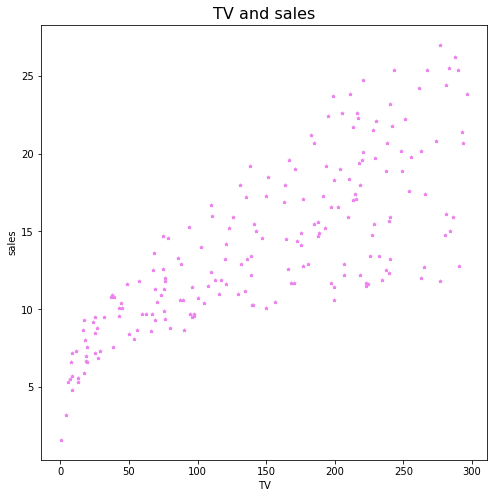

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(dataset['TV'],dataset['Sales'],s=10,c='violet',marker='*')
plt.title('TV and sales',fontsize = 16)
plt.xlabel('TV')
plt.ylabel('sales')

In the graph it is clear that when spending more on TV advertising the sale will go high.There is a positive trend towards Tv advertisement & Sales

**4. Correlation analysis**

In [9]:
dataset.corr()[["Sales"]].T

,TV,Radio,Newspaper,Sales
Sales,0.782224,0.576223,0.228299,1.0


The correlation analysis shows that there is a positive trends towards the sales by different channels of advertisement

**5.Fit a linear regression model on the dataset**

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [13]:
x=dataset[['TV','Radio','Newspaper']]
y=dataset['Sales']

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [15]:
x_train.shape

(160, 3)

In [16]:
dataset.shape

(200, 4)

In [17]:
y_train.shape

(160,)

In [18]:
x_test.shape

(40, 3)

In [19]:
y_test.shape

(40,)

In [20]:
model=LinearRegression()

In [21]:
model.fit(x_train,y_train)

LinearRegression()

In [22]:
model.score(x_train,y_train)

0.90726232040334

In [23]:
model.score(x_test,y_test)

0.8414305188731284

In [25]:
y_pred=model.predict(x_test)
y_pred[0:50]

array([11.90555141,  8.03968116,  6.45950539,  9.097449  ,  7.42911957,
       14.28696366, 15.48719906, 15.12180167,  7.92369068, 18.49961198,
        8.66217883, 17.10326377, 15.01045716, 11.5272445 , 15.47881101,
       17.06063316, 13.45961337, 13.86930776, 15.10483972,  7.6169506 ,
       13.811136  , 10.02459921, 18.16467309, 21.40459992, 12.61772398,
       21.4781719 , 12.82552256,  9.55207944, 15.29874823, 15.81886408,
       17.83767327,  9.19099831, 10.57252798, 24.3250645 ,  9.6040932 ,
        8.10565519, 21.51356595, 18.49791482, 13.7249887 ,  6.45468302])

In [26]:
import sklearn
sklearn.metrics.mean_absolute_error(y_test,y_pred)

1.5127748160818366

In [27]:
model.coef_

array([0.04534976, 0.19342585, 0.00227965])

In [28]:
model.intercept_

2.8014814673517936

In [29]:
coeff_df=pd.DataFrame(model.coef_,index=x.columns)
coeff_df.sort_values(0,ascending=True)

,0
Newspaper,0.002280
TV,0.045350
Radio,0.193426


In [30]:
coeff_df=pd.DataFrame(model.coef_,index=x.columns)
coeff_df.sort_values(0,ascending=False)

,0
Radio,0.193426
TV,0.045350
Newspaper,0.002280
